In [ ]:
%pip install -U wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 7.7 MB/s 
     |████████████████████████████████| 181 kB 53.6 MB/s 
     |████████████████████████████████| 145 kB 56.0 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=f9fe42f048d533afa5326f018e1c744539761186c7c29440a4144928bed62ef7
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
import os
import wandb
import torch
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as imgplt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%pip install -qr /content/drive/MyDrive/YOLOv5/yolov5/requirements.txt

## Train Dataset

In [ ]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
!cd /content/drive/MyDrive/YOLOv5/yolov5 && python train.py --img 480 --batch 20 --epochs 500 --data /content/drive/MyDrive/YOLOv5/data_yml/ship_ds.yml --weights yolov5x.pt

wandb: Currently logged in as: billvan19 (billvan-ai). Use `wandb login --relogin` to force relogin
train: weights=yolov5x.pt, cfg=, data=/content/drive/MyDrive/YOLOv5/data_yml/ship_ds.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=20, imgsz=480, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr

## Validate Model

In [ ]:
!cd /content/drive/MyDrive/YOLOv5/yolov5 &&python val.py --weights /content/drive/MyDrive/YOLOv5/yolov5/runs/train/exp/weights/best.pt --data /content/drive/MyDrive/YOLOv5/data_yml/ship_ds.yml --img 480 --iou 0.55

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
chdir: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
val: data=/content/drive/MyDrive/YOLOv5/data_yml/ship_ds.yml, weights=['/content/drive/MyDrive/YOLOv5/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=480, conf_thres=0.001, iou_thres=0.55, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 444 layers, 86274349 parameters, 0 gradients
val: Scanning '/content/drive/MyDrive/YOLOv5/train/full_dataset/labels.cache' images and labels... 77 found, 1 missing, 0 empty, 0 corrupt: 100% 78/78 [00:00<?, ?it/s]
               Class  

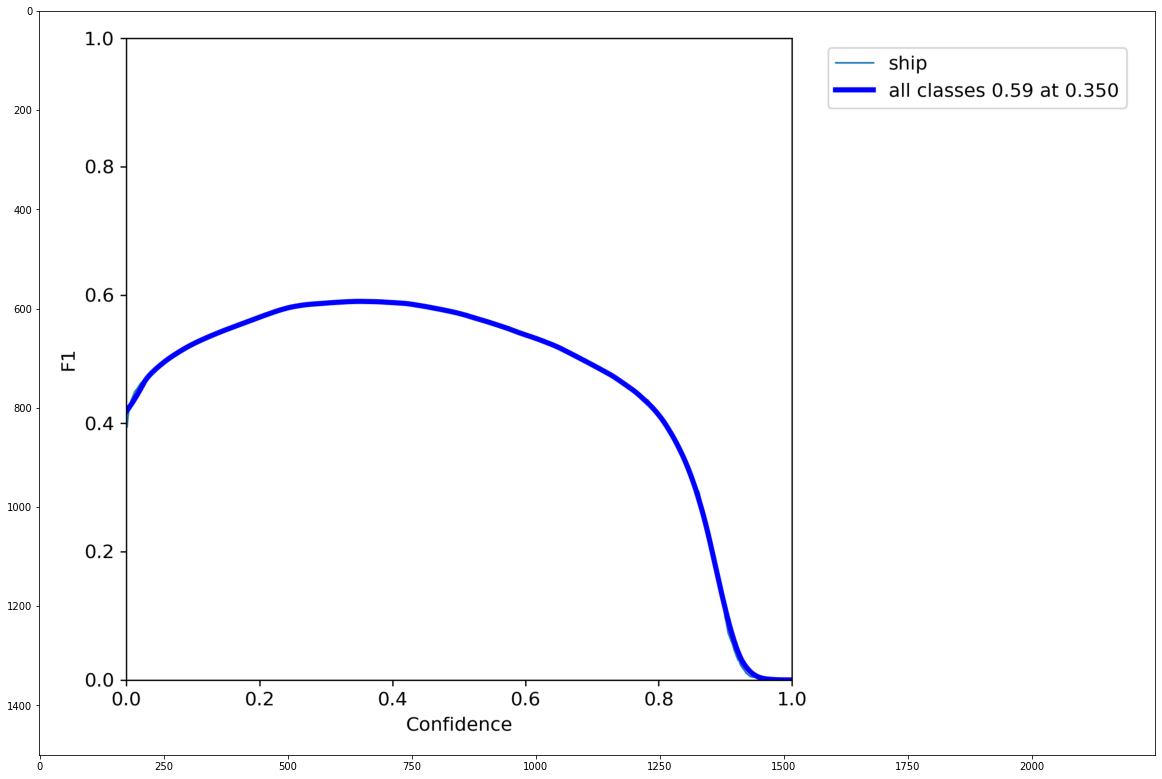

In [ ]:
%matplotlib inline
plt.figure(figsize=(20, 15))
plt.imshow(imgplt.imread("/content/drive/MyDrive/YOLOv5/yolov5/runs/val/exp2/F1_curve.png"))
plt.show()

## Load Model

In [ ]:
ship_model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 444 layers, 86274349 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
PATH = '/content/drive/MyDrive/YOLOv5'
IMG_TEST = os.path.join(PATH, 'test/ship_test/P0857.png')
results = ship_model(IMG_TEST)
results.print()

image 1/1: 1918x1280 71 ships
Speed: 83.0ms pre-process, 74.8ms inference, 2.0ms NMS per image at shape (1, 3, 640, 448)


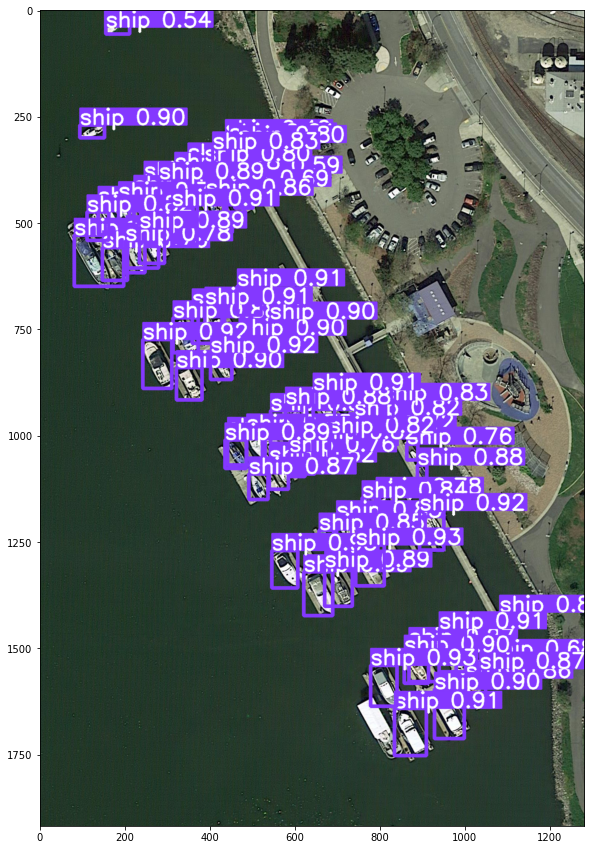

In [ ]:
%matplotlib inline
plt.figure(figsize=(20, 15))
plt.imshow(np.squeeze(results.render()))
plt.show()

## Detect Image (Fine Tuning)

In [ ]:
!cd /content/drive/MyDrive/YOLOv5/yolov5 && python detect.py --img 480 --conf 0.2 --iou 0.55 --weights /content/drive/MyDrive/YOLOv5/yolov5/runs/train/exp/weights/best.pt --source /content/drive/MyDrive/YOLOv5/test/ship_test --save-txt --hide-labels --hide-conf --line-thickness 2

detect: weights=['/content/drive/MyDrive/YOLOv5/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/YOLOv5/test/ship_test, data=data/coco128.yaml, imgsz=[480, 480], conf_thres=0.2, iou_thres=0.55, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=2, hide_labels=True, hide_conf=True, half=False, dnn=False
YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
Model summary: 444 layers, 86274349 parameters, 0 gradients
image 1/29 /content/drive/MyDrive/YOLOv5/test/ship_test/P0695.png: 384x480 378 ships, Done. (1.528s)
image 2/29 /content/drive/MyDrive/YOLOv5/test/ship_test/P0703.png: 480x352 263 ships, Done. (1.427s)
image 3/29 /content/drive/MyDrive/YOLOv5/test/ship_test/P0707.png: 384x480 87 ships, Done. (1.512s)
image 4/29 /content/drive/MyDrive/YO

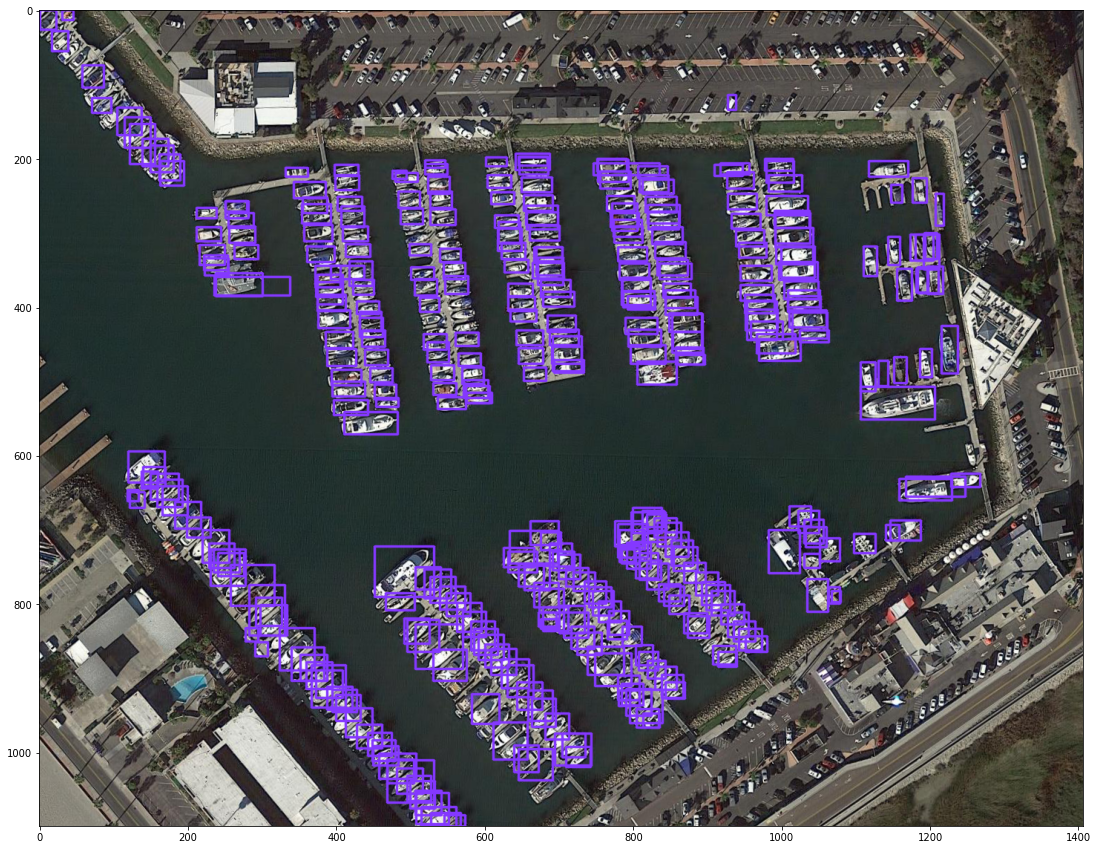

In [ ]:
%matplotlib inline
plt.figure(figsize=(20, 15))
plt.imshow(imgplt.imread("/content/drive/MyDrive/YOLOv5/yolov5/runs/detect/exp7/P0695.png"))
plt.show()